In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
upload=files.upload()

Saving titanic.csv to titanic (1).csv


In [ ]:
df=pd.read_csv("titanic.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1) there are 891 samples.

2) the average age of passengers traveling in titanic is concentrated around 30 years.

3) there are 67% of people are between 15 to 45 and 95 % of people are between 0 to 60 and 4 % people are above 60.

4) The data in age is right skewed because MEAN > MEDIAN

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

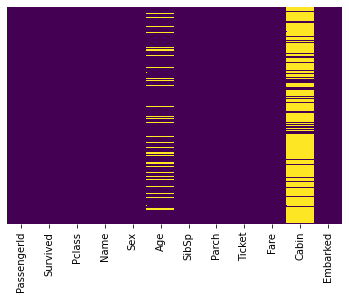

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

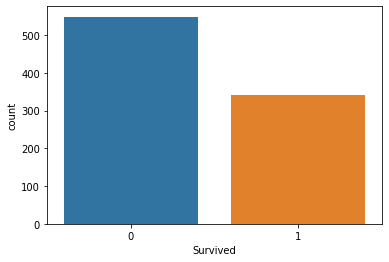

In [ ]:
# what is the survival rate of titanic
sns.countplot(data=df,x="Survived")

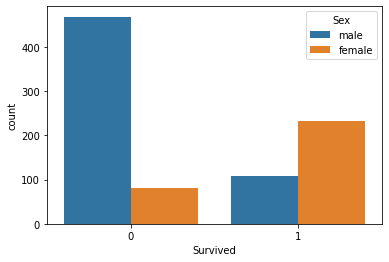

In [ ]:
sns.countplot(data=df,x="Survived",hue="Sex")

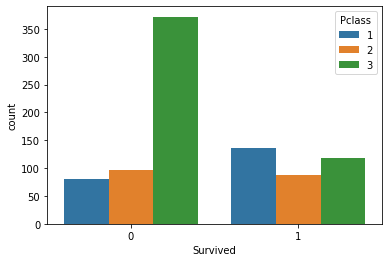

In [ ]:
sns.countplot(data=df,x="Survived",hue="Pclass")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


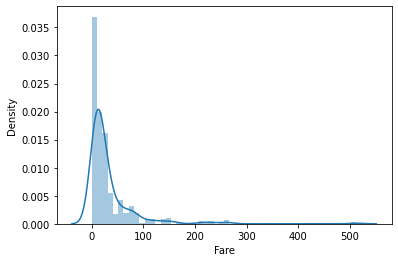

In [ ]:
sns.distplot(df["Fare"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


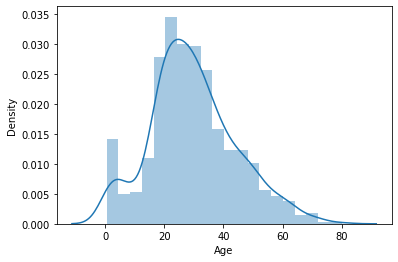

In [ ]:
sns.distplot(df["Age"])

In [ ]:
def fillage(cols):
  age=cols[0]
  pclass=cols[1]
  if(pd.isnull(age)):
    if(pclass==1):
      return 38
    elif(pclass==2):
      return 29
    else:
      return 24
  else:
    return age

In [ ]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

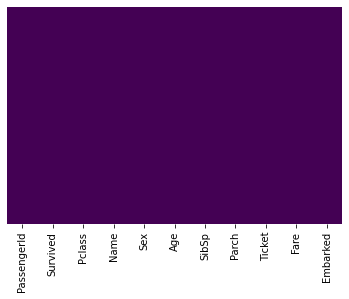

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [ ]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe.fit_transform(df[["Sex","Embarked"]])

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [ ]:
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
X=df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer(
    transformers=[(
                  "encoder",
                  OrdinalEncoder(),
                  ["Sex","Embarked"])
                  ],
    remainder="passthrough"
)

X=ct.fit_transform(X)

In [ ]:
X

array([[ 1.    ,  2.    ,  3.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  2.    ,  3.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  2.    ,  3.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  3.    , ...,  0.    ,  0.    ,  7.75  ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
train=knn.score(X_train,y_train)
test=knn.score(X_test,y_test)

print(f"trainning score : {train}")
print(f"testing score : {test}")

trainning score : 0.7813504823151125
testing score : 0.6928838951310862


In [ ]:
# low bias high variance overfitting

In [ ]:
trainac=[]
testac=[]

for i in range(1,31):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  trainac.append(knn.score(X_train,y_train))
  testac.append(knn.score(X_test,y_test))

In [ ]:
dic={
    "n":np.arange(1,31),
     "train":trainac,
     "test":testac
}
hp=pd.DataFrame(dic)
hp

,n,train,test
0,1,0.987138,0.715356
1,2,0.829582,0.674157
2,3,0.844051,0.696629
3,4,0.786174,0.674157
4,5,0.781350,0.692884
5,6,0.763666,0.666667
6,7,0.763666,0.677903
7,8,0.754019,0.681648
8,9,0.758842,0.666667
9,10,0.745981,0.670412


In [ ]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       166
           1       0.63      0.51      0.57       101

    accuracy                           0.70       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       166
           1       0.79      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
logreg.score(X_train,y_train)

0.7909967845659164

In [ ]:
logreg.score(X_train,y_train)

0.7909967845659164

In [ ]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
train = logreg.score(X_train, y_train)
test = logreg.score(X_test, y_test)


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       165
           1       0.72      0.32      0.45       102

    accuracy                           0.69       267
   macro avg       0.70      0.62      0.62       267
weighted avg       0.70      0.69      0.66       267



In [ ]:
train = svm.score(X_train, y_train)
test = svm.score(X_test, y_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       165
           1       0.72      0.32      0.45       102

    accuracy                           0.69       267
   macro avg       0.70      0.62      0.62       267
weighted avg       0.70      0.69      0.66       267



**Logistic regression gives 84% accuracy.So by logistic regression is best model from all above model.**